# Goal
We will learn how to produce different plots in python including:
- box
plot, bar chart, scatter plot, histogram, network graph, heat map


# Coinflip
class
We will use a simulated coin-flipping experiment to illustrate a number of
different plots. We'll build the infrastructure here.

In [ ]:
!pip install numpy pandas matplotlib datashader networkx seaborn bokeh

In [1]:
# Here, we load the different libraries we'll use in the assignment.
# By doing so, it allows us to accesss new functions that someone else has 
# come up with. For example plt.boxplot(), which allows us to make a boxplot
# with code someone else has already written for us.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
# this embeds plots within the jupyter notebook
%matplotlib inline 

class Coinflip:

    # this function is automatically run when you create an instance of 
    # Coinflip
    def __init__(self, N):
        self.total_flips= N
        self.prob_heads = self.calc_prob() # here we call the function that will calculate P(heads)

    def calc_prob(self):
        num_heads = 0
        for _ in range(self.total_flips): # this loop will run self.total_flips number of times
            flip = random.random() # returns a number in [0, 1)
            if flip > 0.5: # a fair coinflip has equal chance of heads/tails. This is a decent approx. of that
                num_heads += 1

        # this is regular division that returns a decimal
        # if we used //, it would be integer division, which lops off the decimal portion of a number
        prob_heads =  num_heads / self.total_flips
        return prob_heads


# go ahead and change the # of flips to see how P(heads) varies with different sample sizes
a = Coinflip(1000) # everytime you call a new instance of Coinflip, calc_prob is called and you get a new P(heads)
print('total flips:', a.total_flips)
print('P(heads):', a.prob_heads)

total flips: 1000
P(heads): 0.492


# Boxplot Demo
The plan is to run an experiment where we:
- flip a coin 100 times with our simulation
- calculate and collect P(heads)
- repeat that 100 times

We'll then make a boxplot of these probabilities to see how they vary.

In [2]:
# Here we perform the coinflips and collect the probability of heads for each
# iteration

probs = np.array([]) # instantiate an empty numpy array
iterations = 1000 # change number of iterations here
num_flips= 1000   # change number of coinflips per iteration here
for _ in range(iterations):
    b = Coinflip(num_flips) # we create a new instance of the Coinflip class we defined above
    probs = np.append(probs, b.prob_heads) # this adds each P(heads) to the back of probs

# describe() is a cool function from pandas that displays descriptive stats
# note that it doesn't display the median, which is the line inside the box of the boxplot
pd.DataFrame({"P(heads)":probs}).describe()


,P(heads)
count,1000.000000
mean,0.499618
std,0.015724
min,0.442000
25%,0.489000
50%,0.499500
75%,0.510000
max,0.558000


- If you would like to see the documentation on a function, simply type
  ?function_name within a cell and run it.
- For example, ?plt.boxplot would bring up the matplotlib documenation on
   boxplot.
- We will now get a better feel for the probabilities by using a box and
  whisker plot of our data

In [ ]:
?plt.boxplot

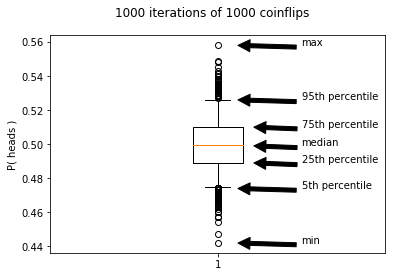

In [3]:
# this allows us to add the title later, but it also controls much more; 
# check the docs to find more.
fig = plt.figure()

# chart title
# now, when we run experiments with different #s of iterations/coinflips
# our title will automatically update to display that information.
fig.suptitle('{} iterations of {} coinflips'.format(iterations,num_flips))

# this allows us to later add annotations with ax.annotate()
ax = fig.add_subplot(111) 

# percentile for the probabilities. To find percentile for our probabilities,
# we sort them from least to greatest, then find the observation that's greater
# than x% of all observations. Therefore, the 90th percentile P(heads) is greater
# than 90% of all probabilities in our sample. You can read more here:
# https://en.wikipedia.org/wiki/Percentile
perc = lambda x: sorted(probs)[int(num_flips*x/100)-1]

# bottom of box
ax.annotate('25th percentile', xy=(1.1, perc(25)), xytext=(1.25, perc(25)),
            arrowprops=dict(facecolor='black', shrink=0.05))
# top of box
ax.annotate('75th percentile', xy=(1.1, perc(75)), xytext=(1.25, perc(75)),
            arrowprops=dict(facecolor='black', shrink=0.05))

# there are an equal number of points greater than and less than the median
# line in the box
median = sorted(probs)[int(num_flips/2)-1]
# line within the box
ax.annotate('median', xy=(1.1, median), xytext=(1.25, median),
            arrowprops=dict(facecolor='black', shrink=0.05))

min= sorted(probs)[0]
# smallest data point
ax.annotate('min', xy=(1.05, min), xytext=(1.25, min),
            arrowprops=dict(facecolor='black', shrink=0.05))
max= sorted(probs)[-1]
# largest data point
ax.annotate('max', xy=(1.05, max), xytext=(1.25, max),
            arrowprops=dict(facecolor='black', shrink=0.05))
# whis controls the whiskers. You can place them at specific percentiles: whis=[x,y]
# or place them at the min and max: whis='range'
whiskers = one, two = [5,95]

# whisker 1
ax.annotate(str(one)+'th percentile', xy=(1.05, perc(one)), xytext=(1.25, perc(one)),
            arrowprops=dict(facecolor='black', shrink=0.05))
# whisker 2
ax.annotate(str(two)+'th percentile', xy=(1.05, perc(two)), xytext=(1.25, perc(two)),
            arrowprops=dict(facecolor='black', shrink=0.05))

# this actually creates the plot
plt.boxplot(probs, whis=whiskers) 
# add y axis
plt.ylabel('P( heads )')
# this must be called in order to view the plot
plt.show()

# Boxplot Exercise
Now you're going to follow a similar procedure as the Demo
and
make a box plot of trip duration from the NYC Taxi data

- use pd.read_csv()
to load train.csv into a variable called train
- show some
summary statistics
for the 'trip_duration' column of train using
pd.DataFrame.describe()

# Data
We'll be taking a look at Stackoverflow Developer Stories data for network
graphs and taxi trip data from the NYC Taxi & Limousine Commission for
the rest of the plots. Go ahead and download the data to the folder you're using
for this assignment from the following sites:

NYC Taxi Data:

- train.csv https://drive.google.com/open?id=1dfvHy90_C0wMkerVgRDpN9VXXbJKwvNQ
- explanation of columns https://www.kaggle.com/c/nyc-taxi-trip-duration/data

In [ ]:
import pandas as pd
#?pd.read_csv
?pd.DataFrame.describe

In [4]:
# again, we load libraries that allow us to access pre-made functions
import pandas as pd
import matplotlib.pyplot as plt
# shows matplotlib plots within the jupyter notebook
%matplotlib inline 
# if you get an error here, you may need to move train.csv to your current working directory from your 
# Downloads folder

#------------------Enter your code here---------------------------#
# load trip.csv
train = pd.read_csv('train.csv')
# use describe() to display summary stats for trip_duration
duration = train['trip_duration']
duration.describe()
#-----------------------------------------------------------------#


count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

- use ax.annotate() to add an arrow pointing to the 75th percentile/top of box
in
our box plot
- add a call to plt.boxplot() to view trip_duration data
- add
the necessary command to display the plot

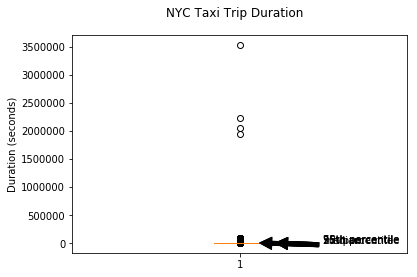

In [5]:
fig = plt.figure()
fig.suptitle("NYC Taxi Trip Duration")
ax = fig.add_subplot(111)
duration = train['trip_duration']
# create a variable with the number of observations in duration
count_duration = len(duration)

# lambda gives another way to define a function. So, we can call
# perc(22) and it substitute 22 for x.
# perc(x) returns the value that is greater than x% of the data
perc = lambda x: sorted(duration)[int(count_duration*x/100)-1]

# bottom of box
ax.annotate('25th percentile', xy=(1.1, perc(25)), xytext=(1.25, perc(25)),
            arrowprops=dict(facecolor='black', shrink=0.05))

#---------------Enter your code here---------------#
# top of box
ax.annotate('75th percentile', xy=(1.1, perc(75)), xytext=(1.25, perc(75)),
            arrowprops=dict(facecolor='black', shrink=0.05))
#--------------------------------------------------#

# there are an equal number of points greater than and less than the median
# line in the box
# sorted() sorts duration from least to greatest
median = sorted(duration)[int(count_duration/2)-1]

# line within the box
ax.annotate('median', xy=(1.1, median), xytext=(1.25, median),
            arrowprops=dict(facecolor='black', shrink=0.05))

# we choose which percentile to set our whiskers at
whiskers = one, two = [5,95]

# whisker 1
ax.annotate(str(one)+'th percentile', xy=(1.05, perc(one)), xytext=(1.25, perc(one)),
            arrowprops=dict(facecolor='black', shrink=0.05))
# whisker 2
ax.annotate(str(two)+'th percentile', xy=(1.05, perc(two)), xytext=(1.25, perc(two)),
            arrowprops=dict(facecolor='black', shrink=0.05))
# add y axis
plt.ylabel('Duration (seconds)')

#---------------Enter your code here---------------#

# boxplot call
plt.boxplot(duration, whis=whiskers)

# display the plot 
plt.show()

#--------------------------------------------------#

- The data is so spread out, we can't even see the box. This is the result of
  outliers, which we can remove from our plot using the showfliers flag to
  plt.boxplot()
- add a call to plt.boxplot() again, but add the showfliers flag so that it
  removes the outliers and we can see the box.
- add the call to display the plot

In [ ]:
?plt.boxplot

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64


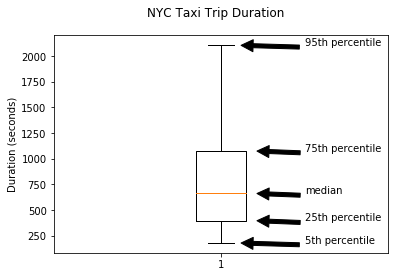

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('train.csv')
duration = train['trip_duration']
print(duration.describe()) # summary stats

# think of plt.figure as the frame of a picture
fig = plt.figure()
fig.suptitle("NYC Taxi Trip Duration")
# think of the ax as the picture within the frame
ax = fig.add_subplot(111)

# create a variable with the number of observations in duration
count_duration = len(duration)

# lambda gives another way to define a function. So, we can call
# perc(22) and it substitute 22 for x.
# perc(x) gives the value that is greater than x% of the data
perc = lambda x: sorted(duration)[int(count_duration*x/100)-1]

# bottom of box
ax.annotate('25th percentile', xy=(1.1, perc(25)), xytext=(1.25, perc(25)),
            arrowprops=dict(facecolor='black', shrink=0.05))
# top of box
ax.annotate('75th percentile', xy=(1.1, perc(75)), xytext=(1.25, perc(75)),
            arrowprops=dict(facecolor='black', shrink=0.05))

# there are an equal number of points greater than and less than the median
# line in the box
# sorted() sorts duration from least to greatest
median = sorted(duration)[int(count_duration/2)-1]

# line within the box
ax.annotate('median', xy=(1.1, median), xytext=(1.25, median),
            arrowprops=dict(facecolor='black', shrink=0.05))

# we choose which percentiles to place our whiskers at
whiskers = one, two = [5,95]

# whisker 1
ax.annotate(str(one)+'th percentile', xy=(1.05, perc(one)), xytext=(1.25, perc(one)),
            arrowprops=dict(facecolor='black', shrink=0.05))
# whisker 2
ax.annotate(str(two)+'th percentile', xy=(1.05, perc(two)), xytext=(1.25, perc(two)),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylabel("Duration (seconds)")
#---------------Enter your code here---------------#

# call to boxplot
plt.boxplot(duration, whis=whiskers, showfliers=False)

# display the plot
plt.show()
#--------------------------------------------------#

# Bar Chart Demo
The plan for this demo is:
- we will perform 100 iterations of
n coinflips for a few different choices of n.
- we will collect (mean, std.
dev.) pairs and graph the results as a bar chart to see how things are changing
as we vary n.

In [7]:
# Bar Chart Demo
# It's common practice to load libraries first to expose their functionality for later
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# we will use this list to collect our data
data = []
# we iterate over our chosen # of coinflips
# for example, when sample_size is 1, we will perform 100 iterations of 1 coinflip
for sample_size in [1, 10, 100, 1000]:
    probs = []                      # this will hold the P(heads) for different iterations
    for _ in range(100):            # number of iterations
        c = Coinflip(sample_size)   # initialize our Coinflip experiment with sample_size flips
        probs.append(c.prob_heads)  # append P(heads) to probs
    probs = np.array(probs)         # convert probs from a list to a numpy array   

    # create an entry with the data we need
    # std. dev. is the square root of variance
    entry = [sample_size, probs.mean(), np.sqrt( probs.var() )]
    # we append our entry to data
    data.append(entry)

# convert data from list to a pandas DataFrame
data = pd.DataFrame(data, columns = ["Sample Size", "Mean", "Std. Dev."])
# display data in the notebook
data

,Sample Size,Mean,Std. Dev.
0,1,0.53000,0.499099
1,10,0.49400,0.175966
2,100,0.50930,0.050877
3,1000,0.50051,0.015790


- Documentation cell: Run the following cell to pull up docs

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#?ax.bar
?ax.text

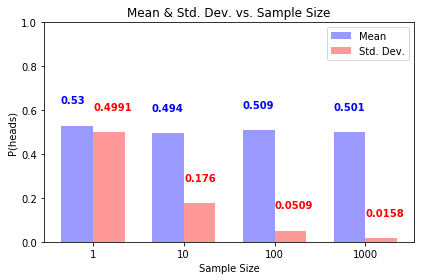

In [8]:
# these allow us to add information to our plot including title, x label, y label, etc. 
# think of fig as the picture frame and ax as the picture
fig, ax = plt.subplots()

# number of data points. Shape returns (# rows, # columns) for a 2D array
data_points = data.shape[0]
# this is similar to the range() function, which returns a generator-
# something similar to a list- from [0, data_points - 1]
index = np.arange(data_points)
# how wide our bars will be in the chart
bar_width = 0.35

# makes our bars more/less see through
opacity = 0.4

# making these columns a bit easier to access
mean = data['Mean']
sd = data['Std. Dev.']

# creates our bar for mean
rect1 = ax.bar(index, mean, bar_width,
               alpha=opacity, color='b',
               label = "Mean")
# creates our bar for std. dev.
rect2 = ax.bar(index + bar_width, sd, bar_width,
               alpha=opacity, color='r',
               label = "Std. Dev.")

# here, we print the value for mean above its bar, making it easier to read
for i, v in enumerate(mean):
    ax.text(i-.18 , v + .1, str(round(v,3)), color='b', fontweight='bold')

# we print value for std. dev.
for i, v in enumerate(sd):
    ax.text(i+.18 , v + .1, str(round(v,4)), color='r', fontweight='bold')

# sets bounds on the y-axis
# we need to do this so we can see the text for value of each bar we added above
ax.set_ylim([0, 1])
ax.set_xlabel('Sample Size')
ax.set_ylabel('P(heads)')
ax.set_title('Mean & Std. Dev. vs. Sample Size')
# this correctly spaces the sample-size labels on the x-axis
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '10', '100', '1000'))
# this displays a legend to identify each bar
ax.legend()

fig.tight_layout()
plt.show()

# Bar Chart Exercise
Make a bar chart of the number of rides with 0, 1, 2, 3,
etc.
passengers

- use pd.DataFrame.groupby to get a count of the number of
rides
that occur with 0, 1, 2, etc. passengers
- you can read more about groupby
here: https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm

-
Documentation cell: Run the following cell to pull up docs

In [ ]:
import pandas as pd
?pd.DataFrame.groupby

In [9]:
# We import libraries as is common practice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# seaborn is an API built on top of matplotlib
# It creates more aesthetically appealing plots and simplifies some things
# read more about what an API is here:
# https://en.wikipedia.org/wiki/Application_programming_interface
import seaborn as sns; sns.set()
%matplotlib inline

# load up the NYC Taxi data
# remember to move train.csv to your current working directory
train = pd.read_csv('train.csv')
# groupby is kind of like a pivot table in excel 
# check the docs by running ?pd.DataFrame.groupby

#-----------------Enter your code here--------------------#
# groupby groups all rows together that correspond to each unique value 
# of passenger counte
# count() collapses all the rows into the number of rows for each group
# ['passenger_count'] returns the column we want
passenger_count = train.groupby('passenger_count').count().id

#---------------------------------------------------------#

# display passenger_count
passenger_count

passenger_count
0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: id, dtype: int64

- Documentation cell: Run the following cell to pull up docs

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
?ax.bar

- write the call to ax.bar() to create the bar chart for passenger count 
vs.
number of rides

passenger_count
0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: id, dtype: int64


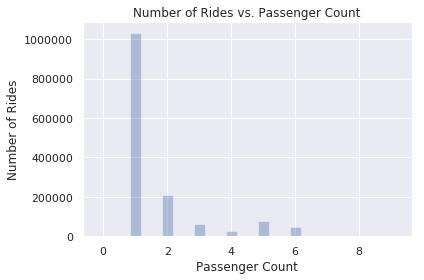

In [10]:
# these give us control of title, x axis, y axis, etc.
fig, ax = plt.subplots()
bar_width=0.35
opacity=0.4
# shape[0] returns the number of rows/observations
# np.arange returns a generator [0, rows in passenger count - 1]
index = np.arange(passenger_count.shape[0])
# we create our passenger count bar
#------------------Enter your code here-------------------#
rect = ax.bar(index, passenger_count, bar_width,
              alpha=opacity, color='b')

#---------------------------------------------------------#
ax.set_xlabel('Passenger Count')
ax.set_ylabel('Number of Rides')
ax.set_title('Number of Rides vs. Passenger Count')

fig.tight_layout()
# a table form of our data
print(passenger_count)
plt.show()


# Scatter Plot Demo
A scatter plot is used for data with two independent
variables (x,y). The plan is:
- generate 100 random points
- classify as above
y=0 or below
- graph points above 0, y=0, and points below 0

In [11]:
# Scatter Plot Demo
# We continue to import our librarires to start
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
# bokeh is another plotting tool we have that comes from Javascript.
# bokeh is a wrapper around that library in python
# it improves aesthetics, simplicity, and allow us to plot large
# amounts of data
from bokeh.plotting import figure, output_notebook, show; output_notebook()

# we create an easy way to return a set of size n random numbers
def rup(n):
    # returns a random number in [-1, 1)
    return np.random.uniform(low=-1, high = 1, size=n)
# we initialize 100 random points in the [-1,1] x [-1,1] plane
data = pd.DataFrame({"X":rup(100), "Y":rup(100)})
# this list will hold our labels for points above/below y=0
label=[]
# we iterate over the y-values
for yval in data["Y"]:
    if yval > 0:           # the pt. is above y=0 if its y-value > 0
        label.append('+')  # denote pts. above origin as '+'
    else:
        label.append('-')  # denote pts. below origin as '-'
# add a column to our data with labels
data['Label'] = label
# the '+' labels will be grouped, followed by '-'
data.sort_values(by=["Label"], inplace=True)
# this  resets the index 
# from disordered (34, 3, 8) to ordered (0, 1, 2)
data.reset_index(drop=True, inplace=True)

# seperate '+' from '-' entries
ind=0
# enumerate(['a', 'b', 'c']) --> [(0, 'a'), (1, 'b'), (2, 'c')]
for i, val in enumerate(data['Label']):
    # at what index do we change from '+' to '-'
    if val == '-':
        ind = i
        # exit the for loop once you've found the transition
        # break exits its innermost for loop
        # so it doesn't matter that it's within an if here
        break

# see the point in data where labels switch
data.iloc[i-1:i+1,:]

Loading BokehJS ...

,X,Y,Label
49,0.726530,0.980700,+
50,0.460366,-0.621338,-


In [ ]:
from bokeh.plotting import figure
?figure

In [12]:
# pixels of resulting image
plot_width, plot_height = int(500), int(500)

# these tools will allow you to move around within the plot, zoom in, or reset 
# to original image
tools='pan, wheel_zoom, reset'
p = figure(title = '100 Random Points',
           tools=tools, plot_width=plot_width, plot_height=plot_height,
           x_range=(-1,1), y_range=(-1,1))


options1 = dict(line_color=None, fill_color='blue', size=5)
# this plots points as circles
# options1 gets added to the end
p.circle(x=data.iloc[:i, 0], y=data.iloc[:i, 1], **options1)

options2 = dict(line_color=None, fill_color='red', size=5)
# this plots points as squares 
# options2 gets added to the end
p.square(x=data.iloc[i:, 0], y=data.iloc[i:, 1], **options2)

# creates a generate-similar to a list-from [-1,1) 
t=np.arange(-1,1,.05)

# this plots y=0 at each point defined in t (-1, -.95, -.90, ...)
p.line(t, np.zeros(len(t)))

# this displays the plot
show(p)

# Scatter Plot Exercise
Your task is to follow the format of the demo and plot
pickup long/lat values
in a scatter plot.

In [13]:
# Scatter Plot Exercise
# we continue with importing libraries to start
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
# output_notebook() is similar to %matplotlib inline
# it embeds the plot within the notebook
from bokeh.plotting import figure, output_notebook, show; output_notebook()

df = pd.read_csv('train.csv')
# lets get a better look at each variable
print(df['pickup_longitude'].describe(),'\n')
print(df['pickup_latitude'].describe())

Loading BokehJS ...

count    1.458644e+06
mean    -7.397349e+01
std      7.090186e-02
min     -1.219333e+02
25%     -7.399187e+01
50%     -7.398174e+01
75%     -7.396733e+01
max     -6.133553e+01
Name: pickup_longitude, dtype: float64 

count    1.458644e+06
mean     4.075092e+01
std      3.288119e-02
min      3.435970e+01
25%      4.073735e+01
50%      4.075410e+01
75%      4.076836e+01
max      5.188108e+01
Name: pickup_latitude, dtype: float64


- add the call to p.circle that will plot pickup latitude
and pickup longitude
-
label the x and y axes

In [14]:
# pixel dimensions of resulting image
plot_width, plot_height = int(500), int(500)
p = figure(tools='pan,wheel_zoom,reset', plot_width=plot_width, plot_height=plot_height)

# turn off gridlines
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# There are more than one million rows in our data.
# We use the sample because it makes it a lot easier/faster for your comp
# to display the graph without losing much meaning from the data. 
# use sample when you're plotting
sample = df.sample(n=10000)

options = dict(line_color=None, fill_color='blue', size=5)
#
#---------------Enter your code here------------------------#
# plots each point as a small circle
p.circle(x=sample['pickup_longitude'], y=sample['pickup_latitude'], **options)
# label the axes
p.xaxis.axis_label="Longitude"
p.yaxis.axis_label="Latitude"
show(p)
#-----------------------------------------------------------#


We can now zoom in to get a better view. You may get a sample that contains an
outlier, which makes this especially relevant. 
- by eye, choose an x and y
range to zoom in on from the previous plot

In [16]:

#----------------Enter your code here-------------#
x=(-74.2,-73.7)
y=(40.6, 40.9)
#-------------------------------------------------#
c = figure(tools=tools, plot_width=plot_width, plot_height=plot_height, 
           x_range=x, y_range =y)

sample = df.sample(n=10000)

options = dict(line_color=None, fill_color='blue', size=5)
# plots each point as a small circle
c.circle(x=sample['pickup_longitude'], y=sample['pickup_latitude'], **options)
c.xaxis.axis_label="Longitude"
c.yaxis.axis_label="Latitude"
show(c)

# Histogram Demo
The plan is:
- do 1000 runs of 100 coin flips 
- plot the
number of heads seen in each trial in a histogram
- we can multiply P(heads) *
sample size to get the # heads

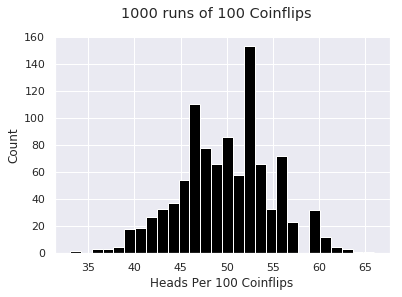

In [15]:
# Histogram Demo 
# loading libraries to access pre-built functionality
import time
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline
sns.set()

# this list will hold the number of heads 
# for each iteration
heads=[]
# number of iterations
for _ in range(1000):
	# initialize Coinflip with 100 flips per iteration
    e = Coinflip(100)
	# P(heads) * number of coinflips is the num_heads
    num_heads = e.prob_heads * 100
	# add this value to our list, making sure it doens't 
	# include a decimal by casting it as int
    heads.append(int(num_heads))


fig = plt.figure()
fig.suptitle('1000 runs of 100 Coinflips')
# the bins of a histogram refer to the groupings 
# on the x-axis of a histogram
# the auto keyword sets how bins are selected.
plt.hist(heads, bins='auto', color='black')
plt.xlabel('Heads Per 100 Coinflips')
plt.ylabel('Count')
plt.show()


# Histogram Exercise
- Follow the example of the demo and plot trip duration.
-
Hint: taking the log may make the values easier to interpret in the final graph
- What's the most likely trip duration?
- add x, y axis labels

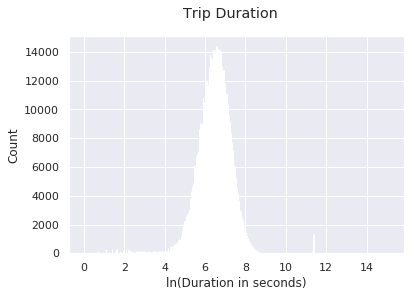

In [17]:
# Histogram Exercise
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv('train.csv')

fig = plt.figure()
fig.suptitle('Trip Duration')
# this bunches all the values closer together
# if you plot raw values, the resultant graph isn't very good and takes a while to load
#-------------Enter your code here-------------------------------#
plt.hist(np.log(train['trip_duration']), bins='auto', color='black') 
plt.xlabel('ln(Duration in seconds)')
plt.ylabel('Count')
#----------------------------------------------------------------#
plt.show()

- Using the histogram, what's the most likely trip duration in seconds?

In [18]:
# as can be seen, the most likely duration is e^7 seconds, which is about 1100s
# and occurs at the peak of the histogram. 
# This is close to the average for duration at ~959s
#-------------------Enter code here--------------#
import numpy as np
np.exp(7)
#------------------------------------------------#

1096.6331584284585

# Network Graph Demo
We will be using data from Stackoverflow's Developer
Stories to illustrate the network graph. Follow the instructions to download the
data.


# Peak at Data
developers put different tags in their Developer Story on
Stackoverflow. They've
collected some info about these tags and provided it to
the public for analysis.
- Nodesize is proportional to how many people use a
specific tag
- tags are
grouped together based on similarity. Each group is
calculated with a cluster
walktrap.
- value is the correlation between the pair
* 100. The greater the
value, the closer the pair will be in the graph.

# Goal
Our goal is to create
a
network graph of this data showing the strength of
connection between nodes,
how
nodes are grouped together, and the size of each
node. We have all the data
necessary to accomplish this.

- Documentation cell:
Run the following cell to pull up docs

In [ ]:
import networkx as nx
#?nx.Graph
#?nx.Graph.add_node
#?nx.Graph.add_weighted_edges_from
#?nx.draw
?nx.spring_layout

In [19]:
# networkx is a library for making network graphs
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import warnings

%matplotlib inline
# we're turning off some warnings
warnings.filterwarnings('ignore')

# make sure you've moved these files from your Downloads folder, or provide the full file path to them in 
# the Downloads folder
nodes_addr = 'https://raw.githubusercontent.com/geofflangenderfer/' +\
             'data/master/Assignment1/stack_network_nodes.csv'
edges_addr = 'https://raw.githubusercontent.com/geofflangenderfer/' +\
             'data/master/Assignment1/stack_network_links.csv'
df_nodes = pd.read_csv(nodes_addr)
df_edges = pd.read_csv(edges_addr)
print("Head of Nodes:",'\n', df_nodes.head(), '\n')
print("Head of Edges:",'\n', df_edges.head())

Head of Nodes: 
         name  group  nodesize
0       html      6    272.45
1        css      6    341.17
2  hibernate      8     29.83
3     spring      8     52.84
4       ruby      3     70.14 

Head of Edges: 
              source target      value
0             azure   .net  20.933192
1        sql-server   .net  32.322524
2           asp.net   .net  48.407030
3  entity-framework   .net  24.370903
4               wpf   .net  32.350925


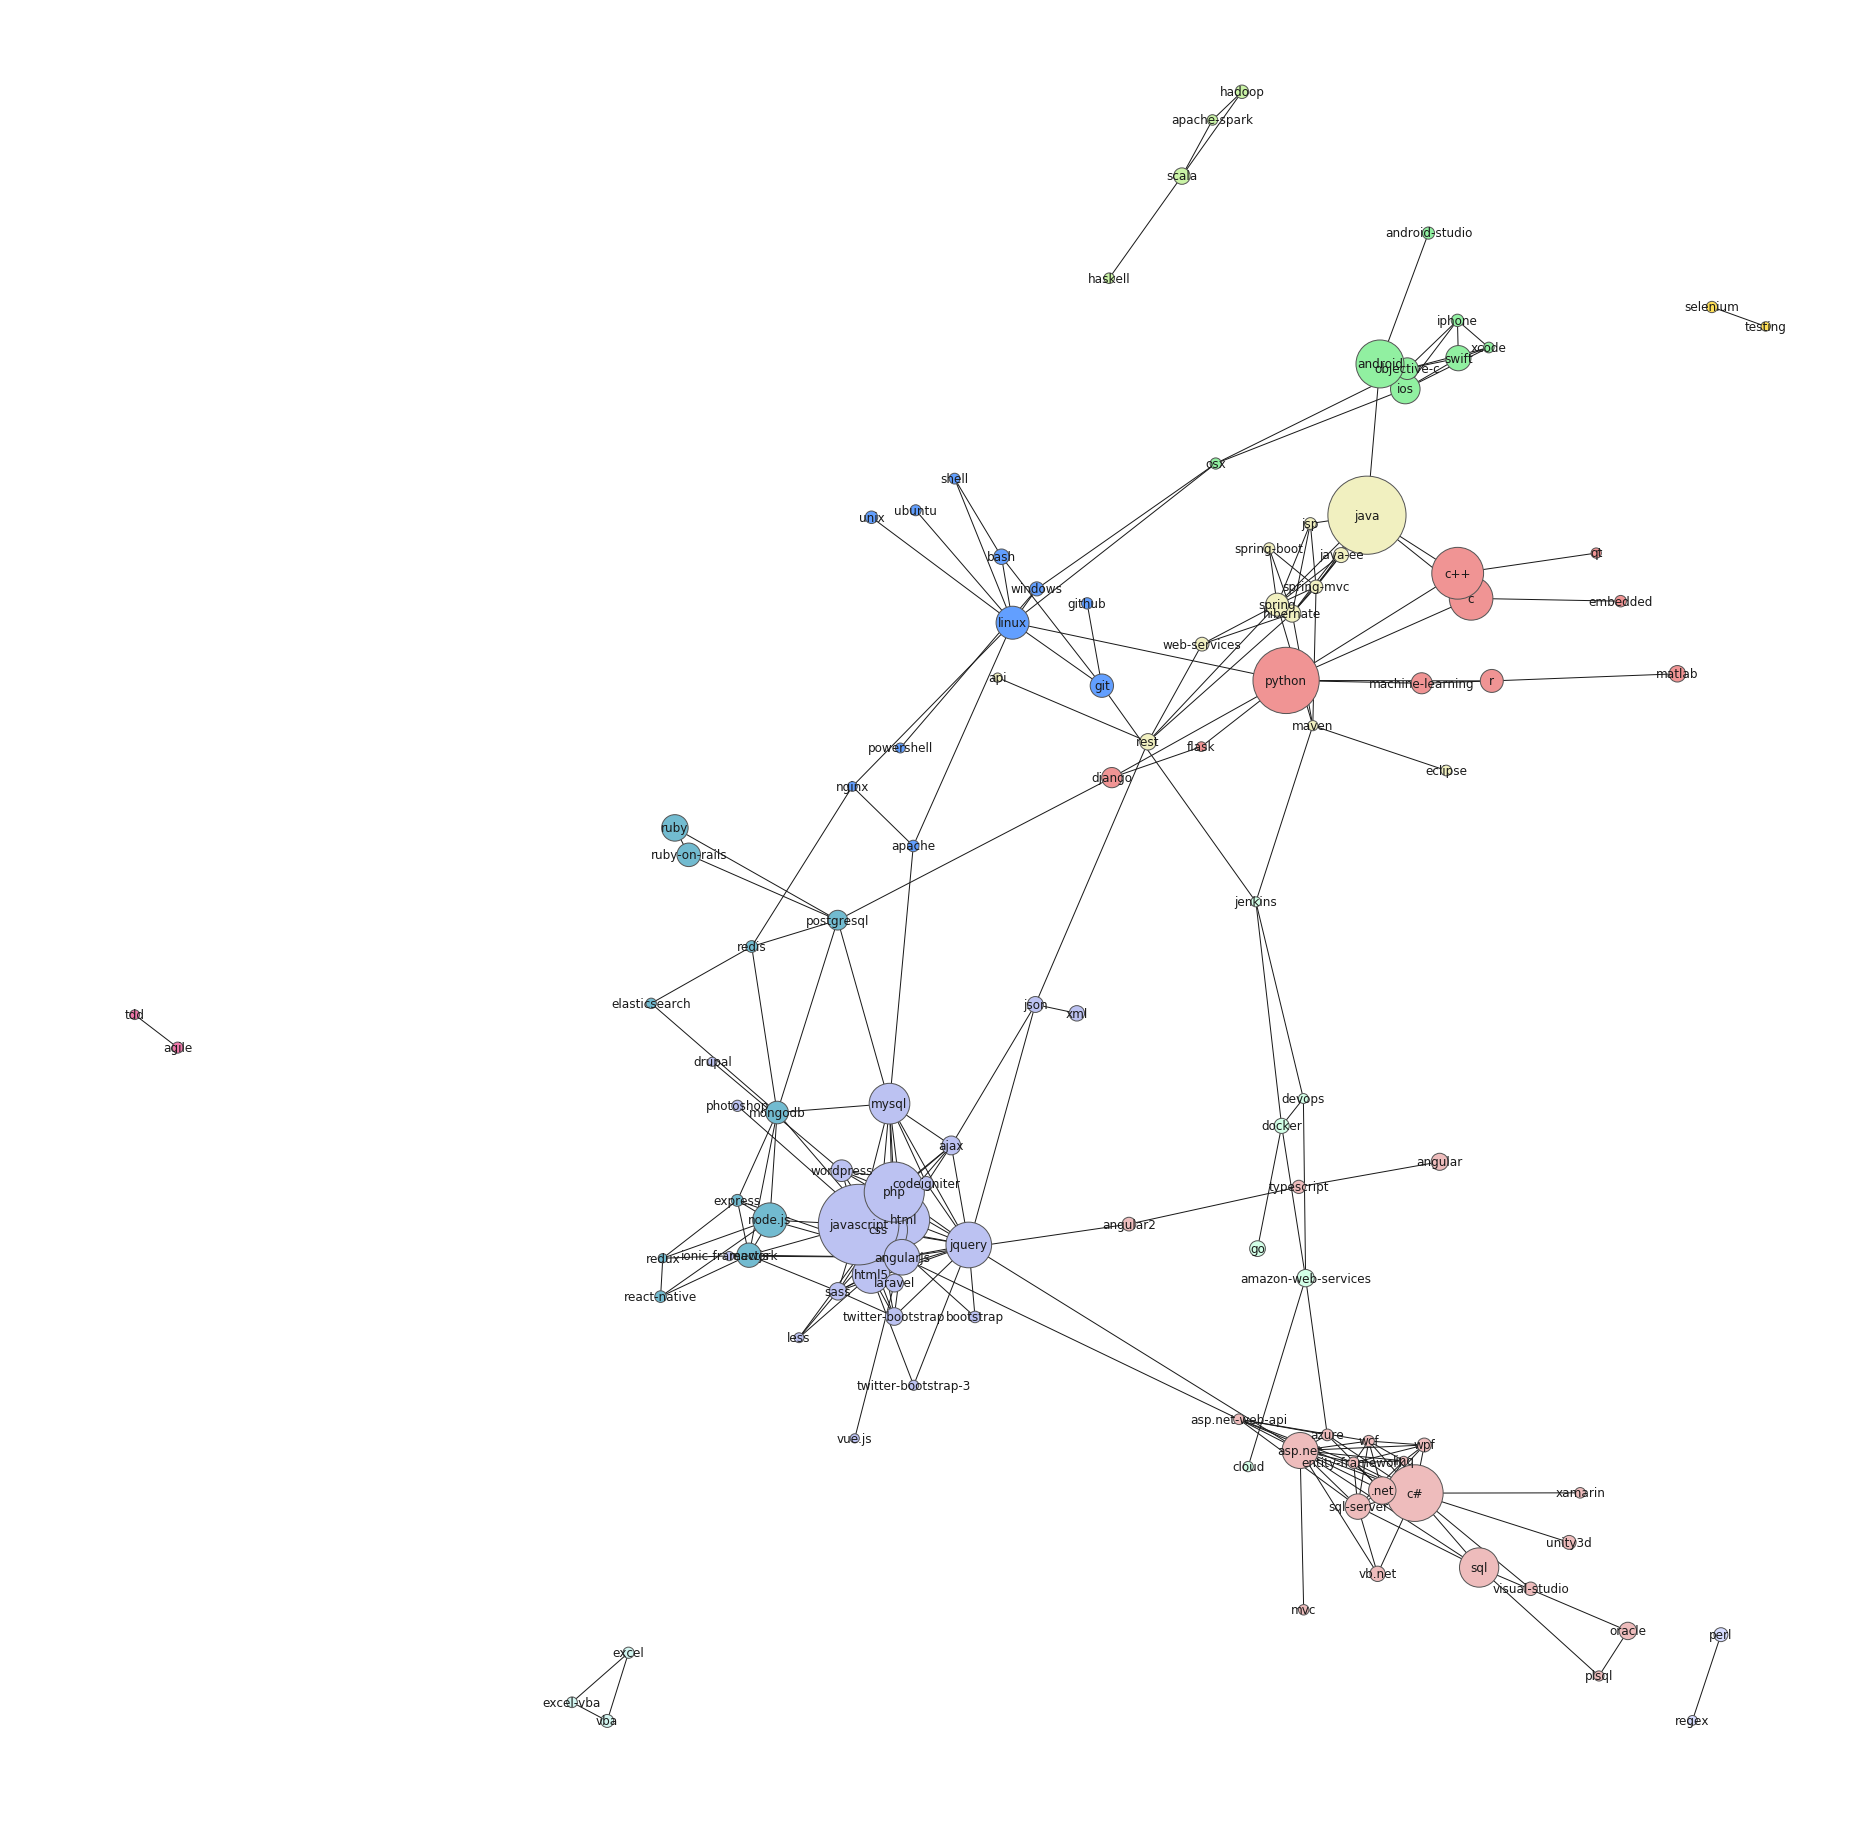

In [20]:
# initialize the graph
G = nx.Graph(name="Stackoverflow_Tags")

# add the nodes
# iterrows takes each row and returns (index, row), similar to enumerate
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])

# add the links between nodes (called edges)
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])

# there will be a different color for each of the 14 groups of nodes
# each of these codes is mapped to a different color
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}

# When you draw the graph, this controls the size of the window/picture frame it comes in.
plt.figure(figsize=(25,25))

# maps each node's group to the color assigned in color_map
# this is a list comprehension. It's equivalent to 
# colors=[]
# for node in G:
#    colors.append(color_map[G.node[node]['group']])
colors = [color_map[G.node[node]['group']] for node in G]

# a list of nodesizes. Modify 10 to change how big the resulting circles are in the graph
sizes = [G.node[node]['nodesize']*10 for node in G]

# command to plot the graph
# G is the networkx graph we've constructed
# pos controls the position of the nodes
# spring_layout uses a particular algorithm to calculate node position-see more via ?nx.spring_layout
# k is in [0,1]. Increase it to increase the distance between circles 
# with_labels writes the language inside the circles
nx.draw(G, node_color=colors, node_size=sizes, 
        pos=nx.spring_layout(G, k=0.5, iterations=50), with_labels=True)

# gca stands for grab current axis
ax = plt.gca()
# sets the color of the edges of the circles
ax.collections[0].set_edgecolor("#555555")
plt.show()

# Network Graph Exercise
Your task is to use the data provided to create a
network graph using
the demo as a guide.

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

nodes = [['python',1,100],
         ['javascript',2,120],
         ['c++',3,75],
         ['bash',4,65]]

edges = [['python','c++',.33],
         ['javascript','c++',.11],
         ['python','bash',.24],
         ['bash','c++', .15],
         ['javascript','c++', .1]]

nodes = pd.DataFrame(nodes, columns=['name','group','nodesize'])
edges = pd.DataFrame(edges, columns=['source','target','value'])
print(nodes.head())
print(edges.head())


         name  group  nodesize
0      python      1       100
1  javascript      2       120
2         c++      3        75
3        bash      4        65
       source target  value
0      python    c++   0.33
1  javascript    c++   0.11
2      python   bash   0.24
3        bash    c++   0.15
4  javascript    c++   0.10


Your task is to:
- initialize the graph
- add the nodes to the graph
- add the
edges to the graph

You will need to use the following functions from networkx:
- nx.Graph
- nx.Graph.add_node 
- nx.Graph.add_weighted_edges_from

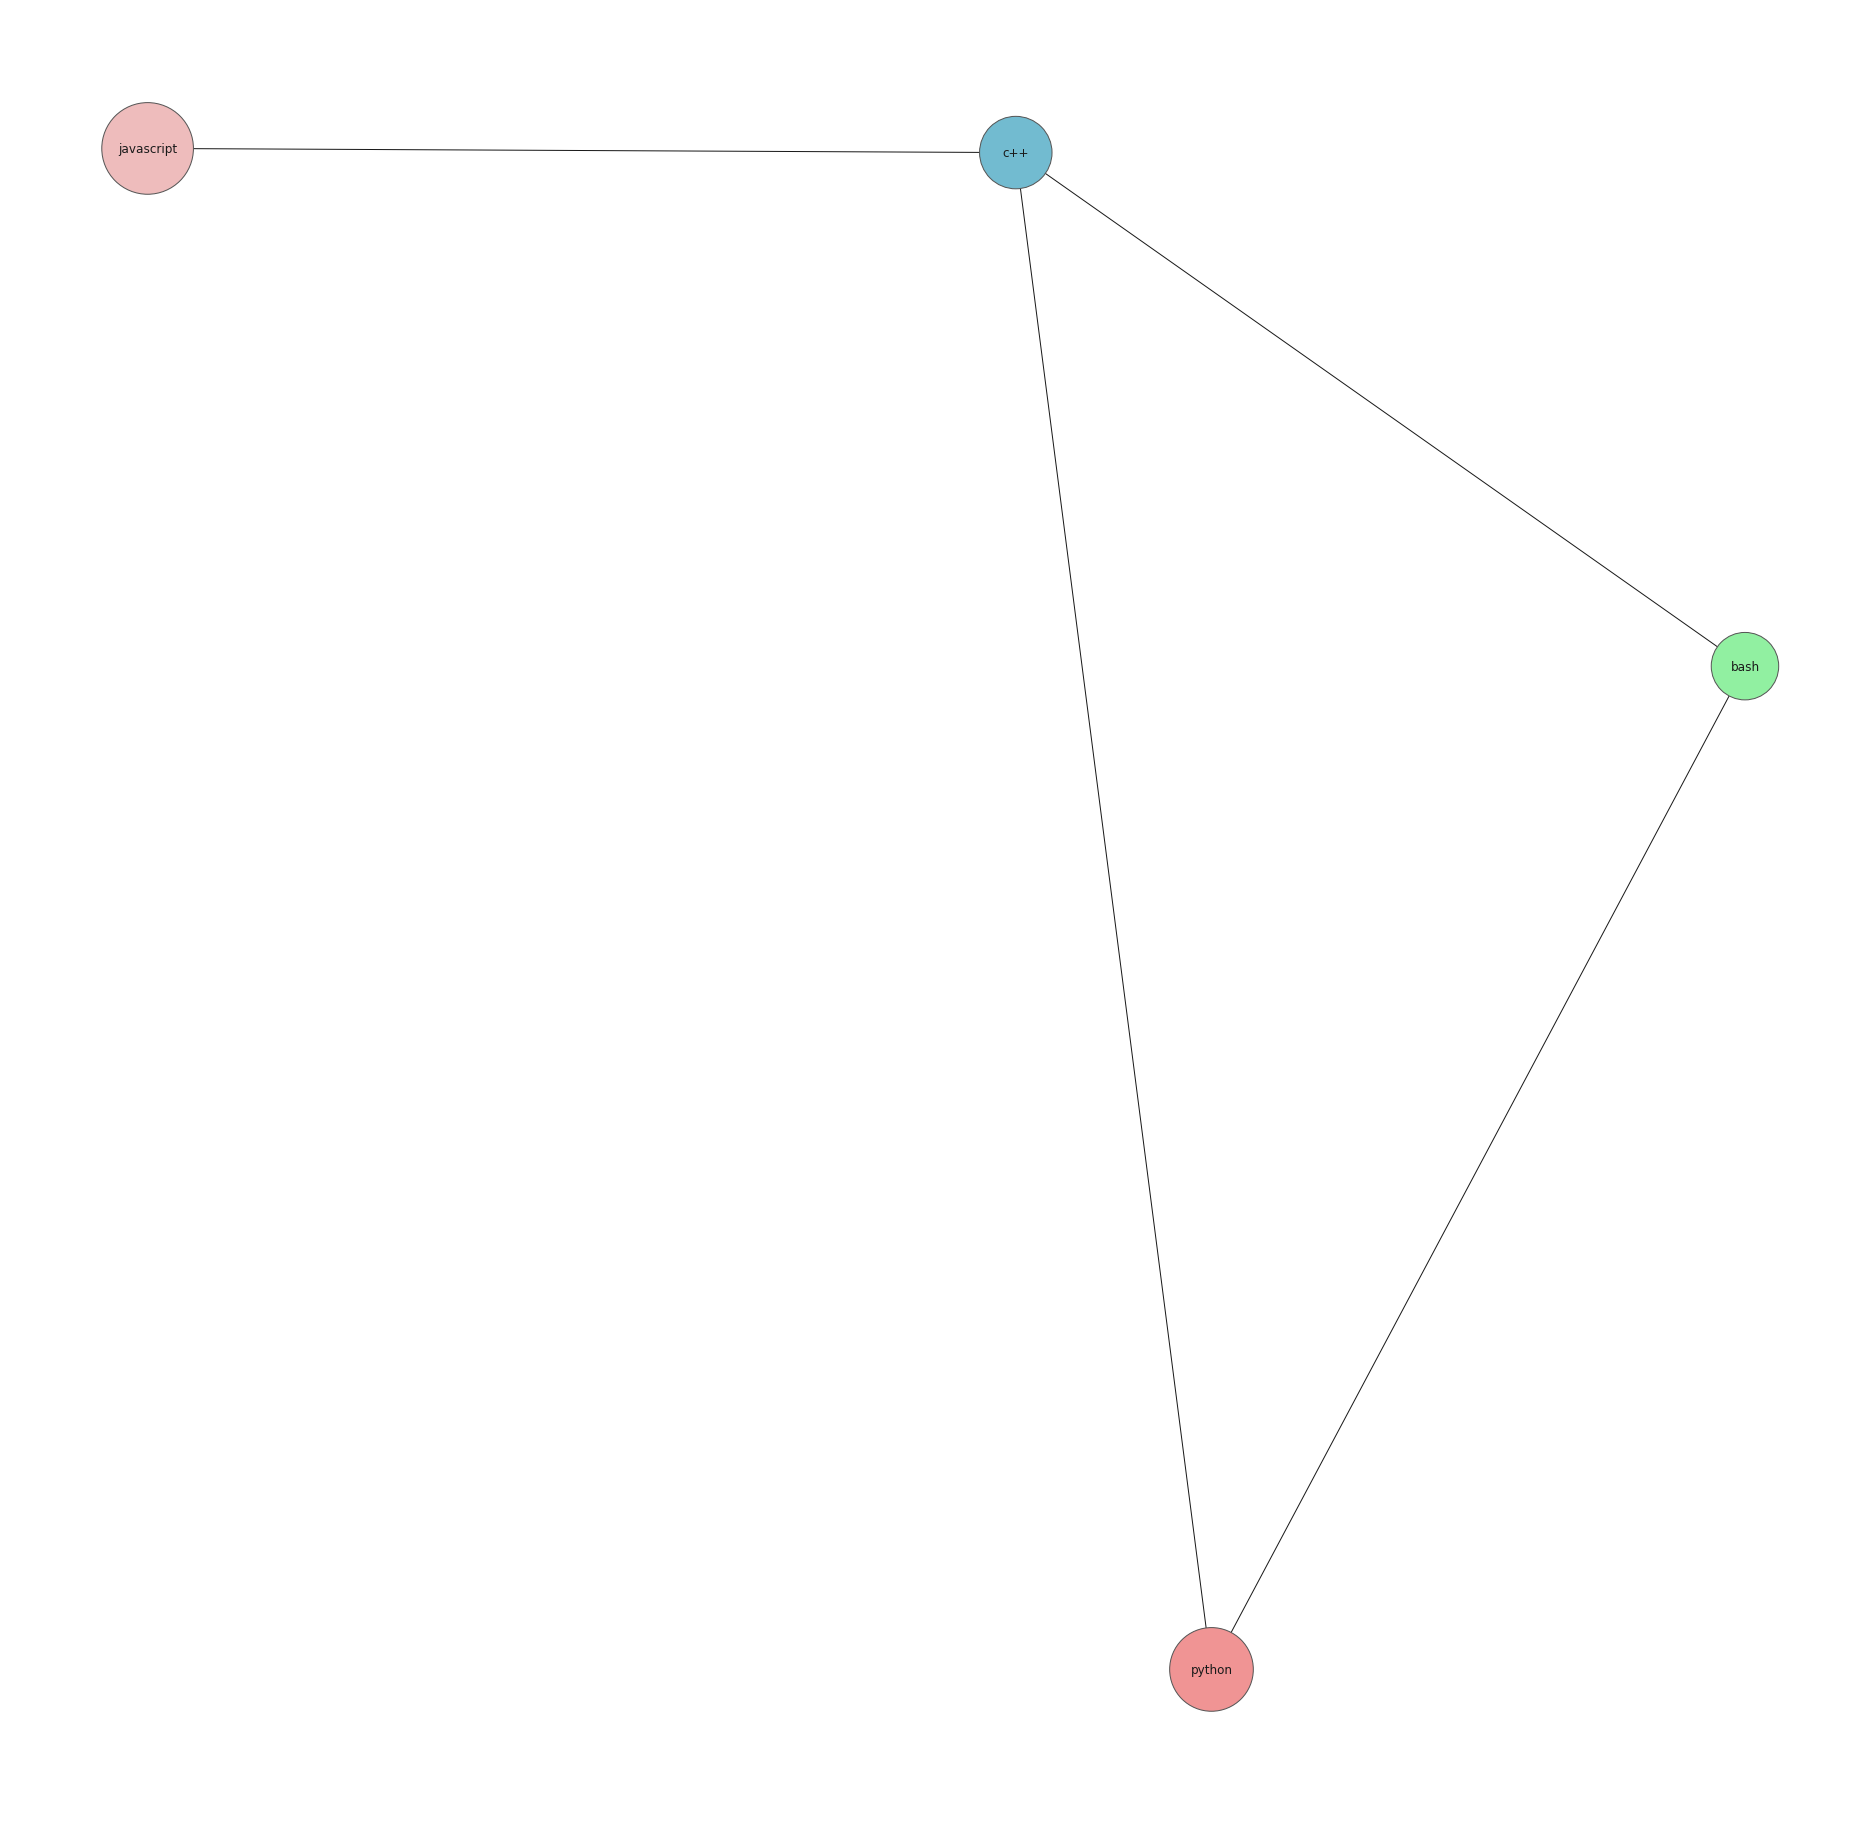

In [23]:
# Network Graph Exercise

#---------------------Your code here------------------------#
# initialize the graph
G = nx.Graph()

# we add each node to the graph
for i, row in nodes.iterrows():
    G.add_node(row['name'], group = row['group'], nodesize=row['nodesize'])
# add each edge/connection to the graph
for i, row in edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
#-----------------------------------------------------------#

plt.figure(figsize=(25,25))

# k is in [0,1]. Increase it to increase the distance between circles 
sizes = [size*70 for size in nodes['nodesize']]
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1'}
colors = [color_map[G.node[node]['group']] for node in G]
# this plots the graph
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.5, iterations=50), 
        with_labels=True)

# gca stands for grab current axis
ax = plt.gca()
# sets the color of the edges of the circles
ax.collections[0].set_edgecolor("#555555")
plt.show()

# Heat Map Demo
- A heat map combines a scatter plot with a histogram. It shades
each pixel based on its density.
- we will make a heat map of dropoff lat/long
for this demo

In [ ]:
import datashader as ds
from datashader import transfer_functions as tf
#?ds.Canvas
#?ds.Canvas.points
?tf.shade

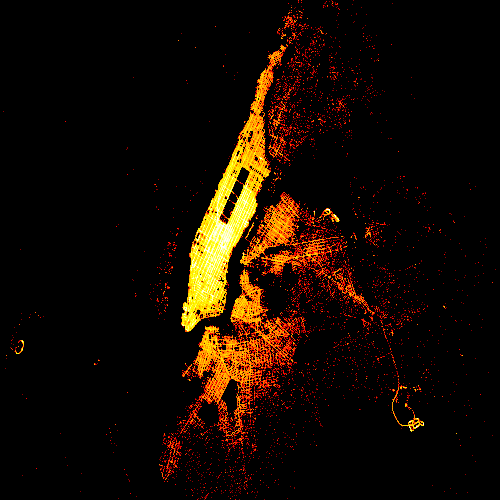

In [24]:
# datashader allows us to handle data with many rows, like NYC Taxi
# it uses bokeh for plotting functionality
import datashader as ds
from datashader.colors import Hot
from datashader import transfer_functions as tf
import numpy as np
import pandas as pd

# load data 
df = pd.read_csv('train.csv')

plot_height, plot_width = int(500), int(500)

# we use the range we found earlier
x_range, y_range = ((-74.2,-73.7), (40.6, 40.9)) 

# this is analogous to plt.figure; it represents the frame for a picture
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range) 

# this plots dropoff long/lat and counts the # of points in each pixel
# notice we don't graph a sample, but the whole dataset; that's the power of datashader.
agg = cvs.points(df, 'dropoff_longitude', 'dropoff_latitude',  ds.count('passenger_count')) 

# this takes the counts from each pixel given by agg and shades them accordingly
# set_background controls the background color
# how controls the transition to different colors based on intensity of each pixel
tf.set_background(tf.shade(agg, cmap=Hot, how='eq_hist'),"black")

# Heat Map Exercise
Fill in the call to agg.where to show greater than 90th
percentile dropoffs.
You will need the following functions:

- np.percentile
-
pd.DataFrame.where

- Documentation cell: Run the following cell to pull up docs

In [ ]:
import numpy as np 
import pandas as pd
?np.percentile
#?pd.DataFrame.where

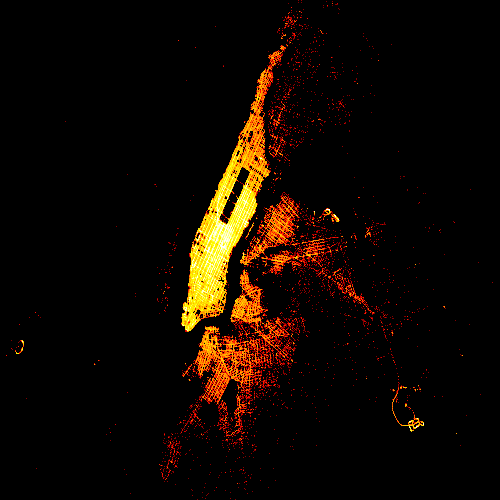

In [25]:
# datashader allows us to handle data with many rows, like NYC Taxi
# it uses bokeh for plotting functionality
import datashader as ds
from datashader.colors import Hot
from datashader import transfer_functions as tf
import numpy as np
import pandas as pd

# load NYC Taxi train data 
df = pd.read_csv('train.csv')

plot_height, plot_width = int(500), int(500)

x_range, y_range = ((-74.2,-73.7), (40.6, 40.9)) 

# sets up frame for plot, analogous to plt.figure
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range) 

# plots dropoff lat/long and sums passenger_count for all points in each pixel
agg = cvs.points(df, 'dropoff_longitude', 'dropoff_latitude',  ds.count('passenger_count')) 

#-----------------Your code here------------------------------#

# fill in the call to agg.where to show 90th percentile or greater dropoffs
tf.set_background(tf.shade(agg.where(agg>np.percentile(agg,90)), 
                  cmap=Hot, how='eq_hist'),"black")

#-------------------------------------------------------------#

# Thinking Ahead
Eventually we will work on predicting trip duration based on
pickup coordinates. This could be tackled many different ways, but the simplest
is fitting a linear model to pickup coordinates and trip duration information.
That's what we learn next week. Read further on linear models here:

- https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

# Privacy
When the NYC Taxi & Limousine
Commission or Stackoverflow
release their data, they assume they're not harming
their customers who provided
that data. This isn't always safe to assume due to
re-identification. You can
read more at the following link:


- https://www.georgetownlawtechreview.org/re-identification-of-anonymized-data/GLTR-04-2017/